# Base Effect

In [29]:

import pandas as pd

df_cpi = pd.read_excel("CPI.xlsx")

start_date = '2017-01-01'
end_date = '2023-05-31'


date_range = pd.date_range(start=start_date, end=end_date, freq='MS')


if len(df_cpi) != len(date_range):
    raise ValueError("The number of CPI values does not match the length of the date range.")


df = pd.DataFrame({"Date": date_range, "CPI": df_cpi["CPI"]})


df.set_index("Date", inplace=True)


print(df)


                CPI
Date               
2017-01-01   288.31
2017-02-01   290.79
2017-03-01   293.93
2017-04-01   298.00
2017-05-01   299.41
...             ...
2023-01-01  1172.27
2023-02-01  1210.75
2023-03-01  1239.49
2023-04-01  1270.13
2023-05-01  1270.57

[77 rows x 1 columns]


Date
2017-01-01          NaN
2017-02-01          NaN
2017-03-01          NaN
2017-04-01          NaN
2017-05-01          NaN
                ...    
2023-01-01    58.090139
2023-02-01    55.467526
2023-03-01    50.807884
2023-04-01    43.888209
2023-05-01    39.989203
Name: Inflation, Length: 77, dtype: float64


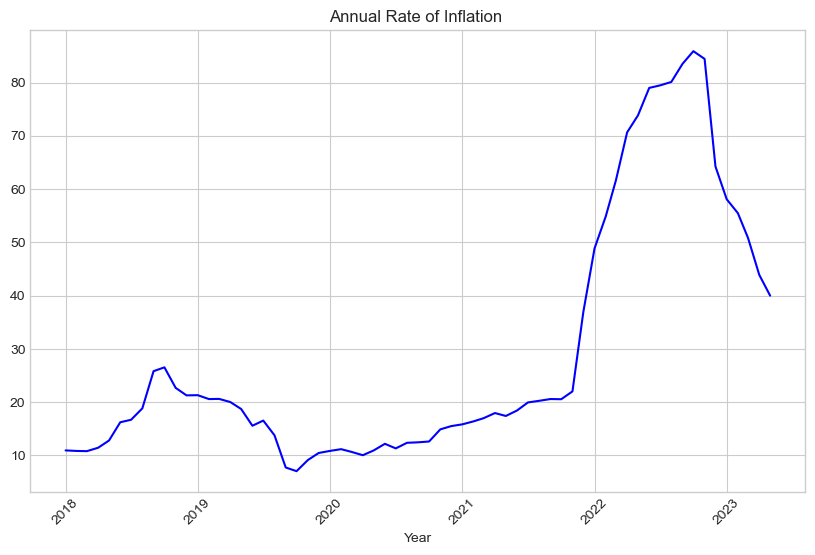

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

class InflationCalculator:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def calculate_inflation(self):
 
        self.dataframe["Inflation"] = self.dataframe["CPI"].pct_change(periods=12) * 100


        return self.dataframe["Inflation"]

    def plot_inflation(self):

        plt.figure(figsize=(10, 6))
        plt.plot(self.dataframe.index, self.dataframe["Inflation"], color="blue")
        plt.title("Annual Rate of Inflation ")
        plt.xlabel("Year")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


calculator = InflationCalculator(df)
inflation_rates = calculator.calculate_inflation()
print(inflation_rates)
calculator.plot_inflation()
